In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  f


# Read from result folder

## Read one result file

In [ ]:
def read_one_result_file(file_name):
  with open(file_name) as f:
    for line in f.readlines():
      try:
        yield int(line.split(" ")[1].strip())
      except:
        pass

def read_one_inma_file(file_name, split=1):
  with open(file_name) as f:
    for line in f.readlines()[1:]:
      line = line.strip()
      try:
        yield list(map(int, line.split(" ")[split:]))
      except:
        pass

## Write result to csv

In [ ]:
import pandas as pd

def write_to_csv(res_path, **kwargs):
  res = kwargs['res']
  mean = kwargs['mean']
  std = kwargs['std']
  file_name = kwargs['file_name']
  try:
    algorithm = kwargs['algorithm']
  except:
    algorithm = 'GNN-DQN'

  num_file = len(res)
  num_run = len(res[0])
  assert len(mean) == num_file
  assert len(std) == num_file
  assert len(file_name) == num_file
  # initialize list of lists
  data = []
  
  for i in range(num_file):
    data.append([file_name[i]] + list(res[i]) + [mean[i], std[i]])
 
  # Create the pandas DataFrame
  df = pd.DataFrame(data, columns = ['File name'] + 
                    ['Run {}'.format(i) for i in range(num_run)] + ['Mean', 'Std'])
 
  # print dataframe.
  df.to_csv(res_path) 

## Plot

In [ ]:
from matplotlib import pyplot as plt

def plot_result(**kwargs):
  res = kwargs['res']
  mean = kwargs['mean']
  mean_inma = kwargs['mean_inma']
  std = kwargs['std']
  file_name = kwargs['file_name']
  scenario = kwargs['scenario']
  x_label = kwargs['x_label']
  nodes = kwargs['nodes']
  fig_name = kwargs['fig_name']
  x = kwargs['x']
  
  num_file = len(res)
  num_run = len(res[0])
  assert len(mean) == num_file
  assert len(std) == num_file
  assert len(file_name) == num_file

  y = np.array(mean)
  y_inma = np.array(mean_inma)
  # example error bar values that vary with x-position
  error = np.array(std)

  fig = plt.figure()
  ax0 = fig.add_subplot(1, 1, 1)
  ax0.errorbar(x, y, yerr=error, fmt='-o', label='GNN-DQN')
  ax0.errorbar(x, y_inma, yerr=np.zeros(len(x)), fmt='-*', label='INMA')
  ax0.set_xticks(x)
  ax0.set_title('Scenario {}'.format(scenario))
  ax0.set_xlabel(x_label)
  ax0.set_ylabel('Number of dead nodes')
  ax0.legend()
  
  fig.savefig(fig_name, format="png", dpi=1200)
  plt.show()

# Main script

# Read GNN-DQN scenarios

In [ ]:
import numpy as np

from os import listdir
from os.path import isfile, join

scenario = 3
x = [200]
x_label = 'Charging parameter nodes'
algorithm = 'gnn-dqn'
res_path_f = '/content/drive/MyDrive/2842022/result/scenario-' + str(scenario) + '/dataset_{}/GSADQL'
file_path = '/content/drive/MyDrive/2842022/result/stat/scenario-{}/{}-scenario-{}.csv'.format(scenario, algorithm, scenario)
fig_name = '/content/drive/MyDrive/2842022/result/stat/scenario-{}/{}-scenario-{}.png'.format(scenario, algorithm, scenario)

res = []
mean = []
std = []
file_names = []
nodes = []
for node in x:
  res_path = res_path_f.format(str(node))
  only_files = sorted([f for f in listdir(res_path) if isfile(join(res_path, f))])

  for file in only_files:
    file_name = res_path + '/' + file
    res_one_file = []
    for val in read_one_result_file(file_name):
      res_one_file.append(val)
    res_one_file = np.array(res_one_file)

    file_names.append(file)
    mean.append(np.mean(res_one_file))
    std.append(np.std(res_one_file))
    res.append(list(res_one_file))
    # nodes.append(int(file[-7:-4]))

write_to_csv(file_path, res=res, mean=mean, std=std, file_name=file_names)

# Read node scenario in INMA

In [ ]:
import numpy as np

from os import listdir
from os.path import isfile, join

scenario = 1
x = [200, 250, 300, 350, 400]
x_label = 'Number of nodes'
algorithm = 'inma'

res_path_f = '/content/drive/MyDrive/2842022/result/scenario-' + str(scenario) + '/dataset_{}/simulate'
file_path = '/content/drive/MyDrive/2842022/result/stat/scenario-{}/{}-scenario-{}.csv'.format(scenario, algorithm, scenario)
fig_name = '/content/drive/MyDrive/2842022/result/stat/scenario-{}/{}-scenario-{}.png'.format(scenario, algorithm, scenario)

res_inma = []
mean_inma = []
std_inma = []
file_names_inma = []
nodes_inma = []
for node in x:
  res_path = res_path_f.format(str(node))
  only_files = sorted([f for f in listdir(res_path) if isfile(join(res_path, f))])

  for file in only_files:
    for val in read_one_inma_file(res_path + '/' + file):
      mean_inma.append(np.mean(val))
      std_inma.append(0) # For comparision algorithm, we don't plot variance
      res_inma.append(list(res_one_file))
      file_names_inma += ['node-{}'.format(node)]


write_to_csv(file_path, res=res_inma, mean=mean_inma, std=std_inma, file_name=file_names_inma, algorithm=algorithm)
# plot_result(res=res, mean=mean, std=std, nodes=nodes, file_name=file_names, 
            # scenario=scenario, x_label=x_label, fig_name=fig_name, x=x, mean_inma=mean_inma)

50


# Read other scenarios INMA

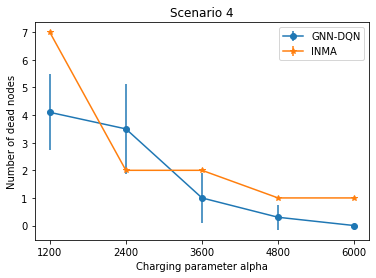

In [ ]:
import numpy as np

from os import listdir
from os.path import isfile, join

algorithm = 'inma'

res_path = '/content/drive/MyDrive/dqn-wrsn/test/scenario-{}/inma'.format(scenario)
file_path = '/content/drive/MyDrive/dqn-wrsn/result/scenario-{}/{}-scenario-{}.csv'.format(scenario, algorithm, scenario)
fig_name = '/content/drive/MyDrive/dqn-wrsn/result/scenario-{}/scenario-{}.png'.format(scenario, scenario)
only_files = sorted([f for f in listdir(res_path) if isfile(join(res_path, f))])

res_inma = []
mean_inma = []
std_inma = []
file_names_inma = []
nodes_inma = []
for file in only_files:
  res_one_file = None
  for val in read_one_inma_file(res_path + '/' + file, split=1):
    res_one_file = np.array(val)
  
    file_names_inma.append(file)
    mean_inma.append(np.mean(res_one_file))
    std_inma.append(0) # For comparision algorithm, we don't plot variance
    res_inma.append(list(res_one_file))
    # nodes_inma.append(int(file[-7:-4]))

plot_result(res=res, mean=mean, std=std, nodes=nodes, file_name=file_names, 
            scenario=scenario, x_label=x_label, fig_name=fig_name, x=x, mean_inma=mean_inma)

# No charging

In [ ]:
from os.path import isfile, join
from os import listdir
TIME = 200000
RATIO = 1
nodes = [200, 250, 300, 350, 400]

path_f = '/content/drive/MyDrive/2842022/dataset_{}/simulate'
for node in nodes:
  path = path_f.format(node)
  files = sorted([f for f in listdir(path) if isfile(join(path, f))])
  
  for file in files:
    counter = 0
    with open(path + '/' + file, 'r') as f:
      for line in f.readlines():
        _, __, consumption, energy = list(map(float , line.split(" ")))
        consumption *= RATIO
        if energy / consumption < TIME:
          counter += 1

    print('node-{}-file-{}: {}'.format(node, file, counter))

# Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


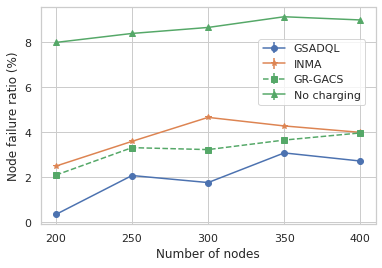

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

x = np.array([200, 250, 300, 350, 400])
# y = np.array([2.11, 4.89, 5.83, 9.56, 11.87])
y = np.array([0.7, 5.2, 5.3, 10.8, 10.9])
# y_inma = np.array([4.7, 6.81, 8.49, 12.13, 12.73])
y_inma = np.array([5, 9, 14, 15, 16])
# y_grgacs = np.array([4.2, 8.3, 9.7, 12.8, 15.9])
y_grgacs = np.array([4.2, 8.3, 9.7, 12.8, 15.9])
no_charging = np.array([16, 21, 26, 32, 36])
error = [0, 0, 0, 0, 0]
plt.style.use("ggplot")
# sns.set_style("ticks")
sns.set_theme(style="whitegrid")
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
ax0.errorbar(x, y/x * 100, yerr=error, fmt='-o', label='GSADQL')
ax0.errorbar(x, y_inma/x * 100, yerr=np.zeros(len(x)), fmt='-*', label='INMA')
ax0.errorbar(x, y_grgacs/x * 100, yerr=np.zeros(len(x)), fmt='s--', label='GR-GACS')
ax0.errorbar(x, no_charging/x * 100, yerr=np.zeros(len(x)), fmt='g^-', label='No charging')
ax0.set_xticks(x)
ax0.set_xlabel("Number of nodes")
ax0.set_ylabel('Node failure ratio (%)')
ax0.legend(loc=(0.65, 0.55))
plt.savefig("/content/drive/MyDrive/2842022/result/stat/plot/scenario1.eps", bbox_inches='tight', dpi=400, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


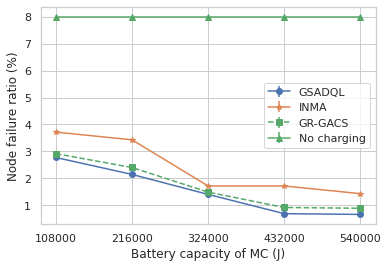

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

x = np.array([350, 350, 350, 350, 350])
z = np.array([108000, 216000, 324000, 432000, 540000])
y = np.array([9.7, 7.5, 4.9, 2.4, 2.3])
y_inma = np.array([13, 12, 6, 6, 5])
y_grgacs = np.array([10.2, 8.4, 5.2, 3.2, 3.1])
no_charging = np.array([28, 28, 28, 28, 28])
error = [0, 0, 0, 0, 0]
plt.style.use("ggplot")
# sns.set_style("ticks")
sns.set_theme(style="whitegrid")
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
ax0.errorbar(z, y/x * 100, yerr=error, fmt='-o', label='GSADQL')
ax0.errorbar(z, y_inma/x * 100, yerr=np.zeros(len(x)), fmt='-*', label='INMA')
ax0.errorbar(z, y_grgacs/x * 100, yerr=np.zeros(len(x)), fmt='s--', label='GR-GACS')
ax0.errorbar(z, no_charging/x * 100, yerr=np.zeros(len(x)), fmt='g^-', label='No charging')
ax0.set_xticks(z)
ax0.set_xlabel("Battery capacity of MC (J)")
ax0.set_ylabel('Node failure ratio (%)')
ax0.legend()
plt.savefig("/content/drive/MyDrive/2842022/result/stat/plot/scenario2.eps", bbox_inches='tight',dpi=400, format='eps')

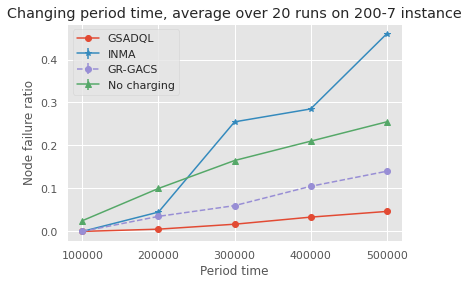

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

x = np.array([200, 200, 200, 200, 200])
z = np.array([100000, 200000, 300000, 400000, 500000])
y = np.array([0, 1.05, 3.35, 6.65, 9.3])
y_inma = np.array([0, 9, 51, 57, 92])
y_grgacs = np.array([0, 7, 12, 21, 28])
no_charging = np.array([5, 20, 33, 42, 51])
error = [0, 0.739932429, 1.061838029, 1.52561463, 0.9]
plt.style.use("ggplot")
# sns.set_style("ticks")
# sns.set_theme(style="darkgrid")
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
ax0.errorbar(z, y/x* 100, fmt='-o', label='GSADQL')
ax0.errorbar(z, y_inma/x * 100, yerr=np.zeros(len(x)), fmt='-*', label='INMA')
ax0.errorbar(z, y_grgacs/x * 100, yerr=np.zeros(len(x)), fmt='o--', label='GR-GACS')
ax0.errorbar(z, no_charging/x * 100, yerr=np.zeros(len(x)), fmt='g^-', label='No charging')
ax0.set_xticks(z)
ax0.set_title('Changing period time, average over 20 runs on 200-7 instance')
ax0.set_xlabel("Period time")
ax0.set_ylabel('Node failure ratio (%)')
ax0.legend()
plt.savefig("/content/drive/MyDrive/2842022/result/stat/plot/scenario3-1.eps", bbox_inches='tight',dpi=400, format='eps')

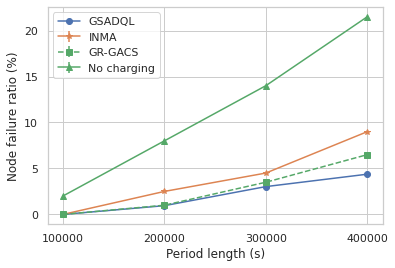

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

x = np.array([200, 200, 200, 200])
z = np.array([100000, 200000, 300000, 400000])
y = np.array([0, 1.9, 6.05, 8.75])
y_inma = np.array([0, 5, 9, 18])
y_grgacs = np.array([0, 2, 7, 13])
no_charging = np.array([4, 16, 28, 43])
error = [0, 0.739932429, 1.061838029, 1.52561463, 0.9]
plt.style.use("ggplot")
# sns.set_style("ticks")
sns.set_theme(style="whitegrid")
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
ax0.errorbar(z, y/x * 100, fmt='-o', label='GSADQL')
ax0.errorbar(z, y_inma/x * 100, yerr=np.zeros(len(x)), fmt='-*', label='INMA')
ax0.errorbar(z, y_grgacs/x * 100, yerr=np.zeros(len(x)), fmt='s--', label='GR-GACS')
ax0.errorbar(z, no_charging/x * 100, yerr=np.zeros(len(x)), fmt='g^-', label='No charging')
ax0.set_xticks(z)
ax0.set_xlabel("Period length (s)")
ax0.set_ylabel('Node failure ratio (%)')
ax0.legend()
plt.savefig("/content/drive/MyDrive/2842022/result/stat/plot/scenario3.eps", bbox_inches='tight',dpi=400, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


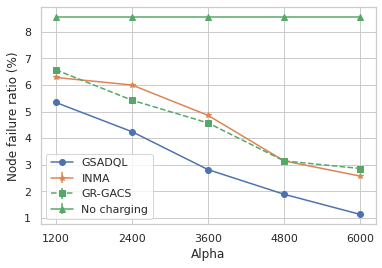

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rc
import matplotlib



x = np.array([350, 350, 350, 350, 350])
z = np.array([1200, 2400, 3600, 4800, 6000])
y = np.array([18.7, 14.85, 9.85, 6.6, 3.95])
y_inma = np.array([22, 21, 17, 11, 9])
y_grgacs = np.array([23, 19, 16, 11, 10])
no_charging = np.array([30, 30, 30, 30, 30])
error = [0, 0.739932429, 1.061838029, 1.52561463, 0.9]
plt.style.use("ggplot")
# sns.set_style("ticks")
sns.set_theme(style="whitegrid")
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
ax0.errorbar(z, y/x * 100, fmt='-o', label='GSADQL')
ax0.errorbar(z, y_inma/x * 100, yerr=np.zeros(len(x)), fmt='-*', label='INMA')
ax0.errorbar(z, y_grgacs/x * 100, yerr=np.zeros(len(x)), fmt='s--', label='GR-GACS')
ax0.errorbar(z, no_charging/x * 100, yerr=np.zeros(len(x)), fmt='g^-', label='No charging')
ax0.set_xticks(z)
ax0.set_xlabel('Alpha')
ax0.set_ylabel('Node failure ratio (%)')
ax0.legend()
plt.savefig("/content/drive/MyDrive/2842022/result/stat/plot/scenario41.eps", bbox_inches='tight',dpi=400, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


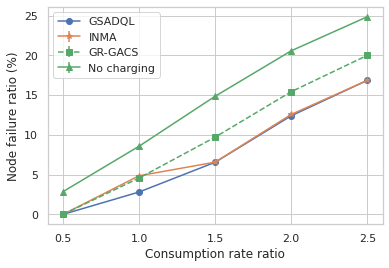

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

x = np.array([350, 350, 350, 350, 350])
z = np.array([0.5, 1, 1.5, 2, 2.5])
y = np.array([0, 9.85, 22.95, 43.4, 59])
y_inma = np.array([0, 17, 23, 44, 59])
y_grgacs = np.array([0, 16, 34, 54, 70])
no_charging = np.array([10, 30, 52, 72, 87])
error = [0, 0.739932429, 1.061838029, 1.52561463, 0.9]
plt.style.use("ggplot")
# sns.set_style("ticks")
sns.set_theme(style="whitegrid")
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
ax0.errorbar(z, y/x * 100, fmt='-o', label='GSADQL')
ax0.errorbar(z, y_inma/x * 100, yerr=np.zeros(len(x)), fmt='-*', label='INMA')
ax0.errorbar(z, y_grgacs/x * 100, yerr=np.zeros(len(x)), fmt='s--', label='GR-GACS')
ax0.errorbar(z, no_charging/x * 100, yerr=np.zeros(len(x)), fmt='g^-', label='No charging')
ax0.set_xticks(z)
ax0.set_xlabel("Consumption rate ratio")
ax0.set_ylabel('Node failure ratio (%)')
ax0.legend()
plt.savefig("/content/drive/MyDrive/2842022/result/stat/plot/scenario5.eps", bbox_inches='tight',dpi=400, format='eps')

# Impact of Delta

In [ ]:
import pickle
import io
reward = None
end_episode = None

with open("/content/drive/MyDrive/2842022/result/scenario-6/dataset_200/GSADQL/reward.pkl", "rb") as f:
  reward = pickle.load(f)

with open("/content/drive/MyDrive/2842022/result/scenario-6/dataset_200/GSADQL/end-episode-reward.pkl", "rb") as f:
  end_episode = pickle.load(f)

In [ ]:
run = [0]
for i, v in enumerate(end_episode[:-1]):
  if v > end_episode[i+1]:
    run.append(i)
    # print(v)
    # print(end_episode[i+1])
run.append(690)
reward_hist = []
for i in range(100):
  if i % 20 == 0:
    reward_hist.append(None)
    reward_hist[-1] = temp[:length]
    temp = [0 for _ in range(200)]
    length = 1000
    
  length = min(length, len(reward[run[i]: run[i+1]]))
  for j in range(length):
    temp[j] += reward[run[i]+j]

len(reward_hist)

5

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/2842022/result/scenario-6/dataset_200/GSADQL/node.xlsx')
df

,Number of dead nodes,Delta
0,1,20
1,4,20
2,1,20
3,3,20
4,3,20
...,...,...
95,1,100
96,1,100
97,0,100
98,3,100


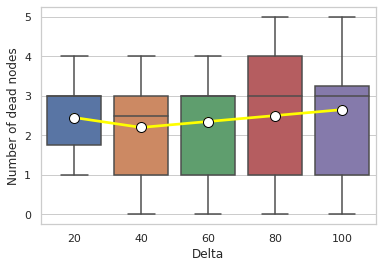

In [ ]:
ax = sns.boxplot(x="Delta", y="Number of dead nodes", data=df, showmeans=True,
                 meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
sns.pointplot(x='Delta', y='Number of dead nodes', data=df.groupby('Delta', as_index=False).mean(), ax=ax, color='yellow')
plt.savefig("/content/drive/MyDrive/2842022/result/scenario-6/delta.eps", bbox_inches='tight',dpi=400, format='eps')